### Create water mask using Scene Classification Layer (Sentinel 2)

In [2]:
import os
import glob as glob
import numpy as np
import zipfile

# Python libraries for visualization
import rasterio
from rasterio import plot
from rasterio.plot import show
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import get_cmap
from matplotlib.axes import Axes
from IPython.display import HTML
# from skimage import exposure

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)

In [8]:
imgfiles = r"/Users/tnmthai/Downloads/S2B_MSIL2A_20230428T222549_N0509_R029_T59GPM_20230428T235118.SAFE/GRANULE/L2A_T59GPM_A032087_20230428T222546/IMG_DATA/R20m/"
scl_image=rasterio.open(imgfiles + "T59GPM_20230428T222549_SCL_20m.jp2")

In [9]:
scl = scl_image.read()
scl = np.array(scl)
scl

array([[[4, 4, 4, ..., 6, 6, 6],
        [4, 4, 4, ..., 6, 6, 6],
        [4, 4, 4, ..., 6, 6, 6],
        ...,
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6],
        [6, 6, 6, ..., 6, 6, 6]]], dtype=uint8)

In [10]:
water = np.where(scl != 6, np.nan, scl)
water

array([[[nan, nan, nan, ...,  6.,  6.,  6.],
        [nan, nan, nan, ...,  6.,  6.,  6.],
        [nan, nan, nan, ...,  6.,  6.,  6.],
        ...,
        [ 6.,  6.,  6., ...,  6.,  6.,  6.],
        [ 6.,  6.,  6., ...,  6.,  6.,  6.],
        [ 6.,  6.,  6., ...,  6.,  6.,  6.]]])

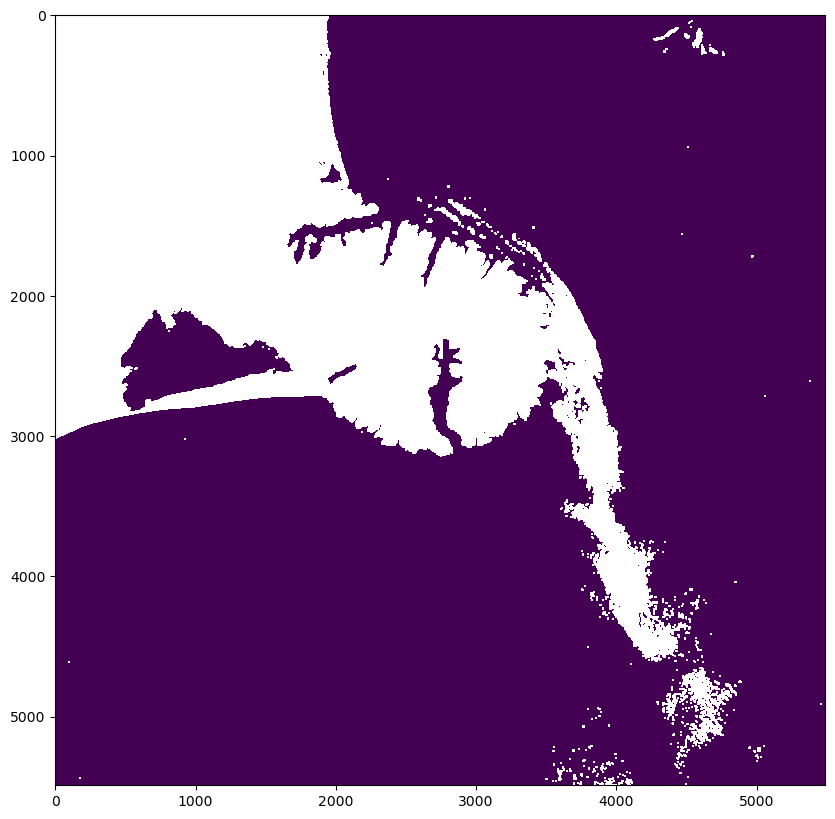

<Axes: >

In [11]:
fig = plt.figure(figsize=(10,10))
show(water)

In [12]:
meta = scl_image.meta
meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

In [14]:
water_path = 'water.tif'

with rasterio.open(water_path, 'w', **meta) as dest:
    dest.write(water.astype(rasterio.float32))

Hi Francelino,
